In [1]:
import numpy as np
np.random.seed(1000)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [2]:
import keras
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential

In [3]:
import os
import cv2
from PIL import Image

In [4]:
DATA_DIR = 'E:\Thesis 4100\Malaria_Cell_Detection\Malaria_Detection_using_CNN\cell_images\cell_images/'
SIZE = 64
dataset = []
label = []

In [5]:
parasitized_images = os.listdir(DATA_DIR + 'Parasitized/')
for i, image_name in enumerate(parasitized_images):
    try:
        if (image_name.split('.')[1] == 'png'):
            image = cv2.imread(DATA_DIR + 'Parasitized/' + image_name)
            image = Image.fromarray(image, 'RGB')
            image = image.resize((SIZE, SIZE))
            dataset.append(np.array(image))
            label.append(0)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

In [6]:
uninfected_images = os.listdir(DATA_DIR + 'Uninfected/')
for i, image_name in enumerate(uninfected_images):
    try:
        if (image_name.split('.')[1] == 'png'):
            image = cv2.imread(DATA_DIR + 'Uninfected/' + image_name)
            image = Image.fromarray(image, 'RGB')
            image = image.resize((SIZE, SIZE))
            dataset.append(np.array(image))
            label.append(1)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

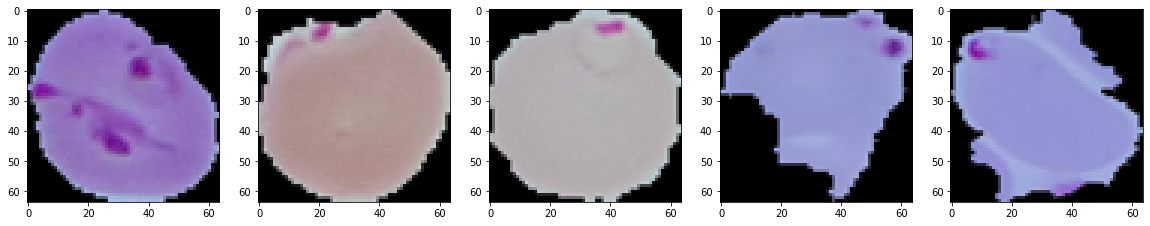

In [7]:
plt.figure(figsize = (20, 12))
for index, image_index in enumerate(np.random.randint(len(parasitized_images), size = 5)):
    plt.subplot(1, 5, index+1)
    plt.imshow(dataset[image_index])

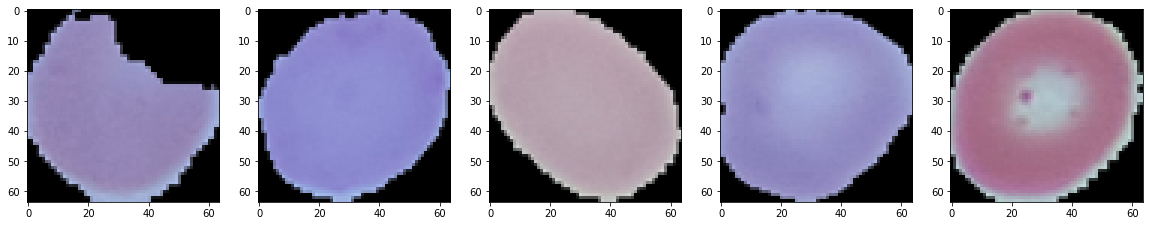

In [8]:
plt.figure(figsize = (20, 12))
for index, image_index in enumerate(np.random.randint(len(uninfected_images), size = 5)):
    plt.subplot(1, 5, index+1)
    plt.imshow(dataset[len(parasitized_images) + image_index])

In [15]:
classifier = None
classifier = Sequential()
classifier.add(Convolution2D(32, (3, 3), input_shape = (SIZE, SIZE, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Flatten())
classifier.add(Dense(activation = 'relu', units=512))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Dense(activation = 'relu', units=256))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Dense(activation = 'sigmoid', units=2))
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(classifier.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 31, 31, 32)       128       
 ormalization)                                                   
                                                                 
 dropout_4 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)      

In [16]:
from keras.utils.vis_utils import plot_model

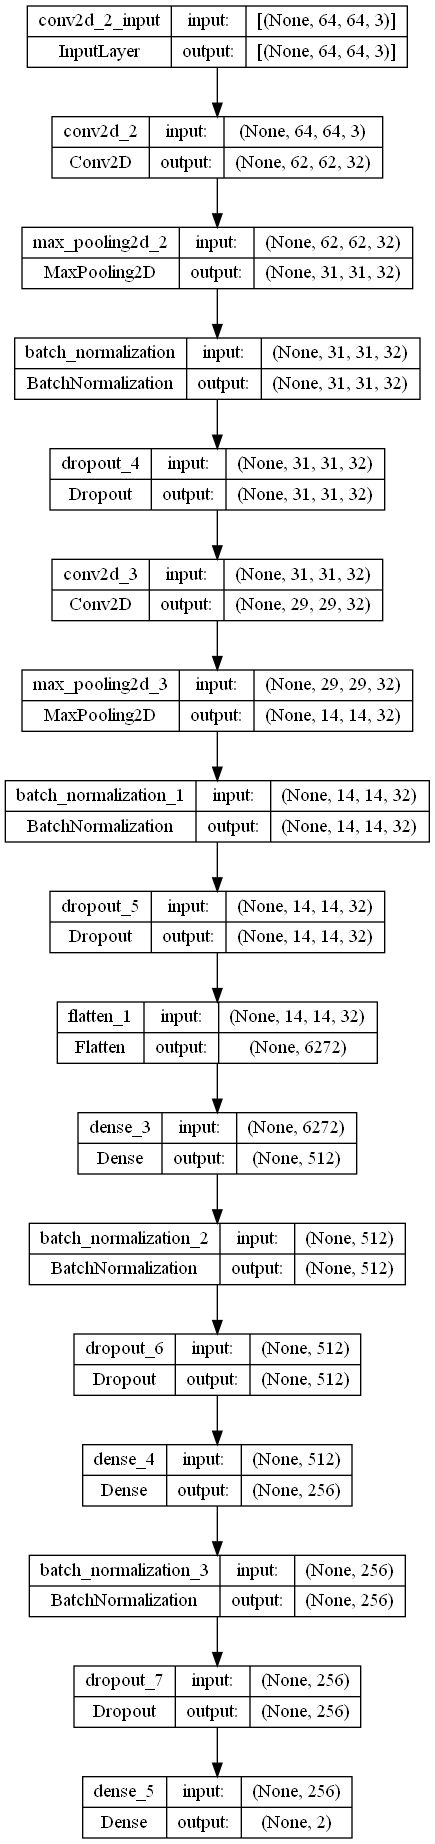

In [17]:
plot_model(classifier, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [18]:
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.20, random_state = 0)

In [20]:
history = classifier.fit(np.array(X_train), 
                         y_train, 
                         batch_size = 64, 
                         verbose = 2, 
                         epochs = 50, 
                         validation_split = 0.1,
                         shuffle = False)

Epoch 1/50
311/311 - 129s - loss: 0.4560 - accuracy: 0.8075 - val_loss: 0.6077 - val_accuracy: 0.8449 - 129s/epoch - 413ms/step
Epoch 2/50
311/311 - 131s - loss: 0.2360 - accuracy: 0.9145 - val_loss: 0.3589 - val_accuracy: 0.9066 - 131s/epoch - 421ms/step
Epoch 3/50
311/311 - 123s - loss: 0.1981 - accuracy: 0.9305 - val_loss: 0.1973 - val_accuracy: 0.9324 - 123s/epoch - 396ms/step
Epoch 4/50
311/311 - 118s - loss: 0.1810 - accuracy: 0.9355 - val_loss: 0.2192 - val_accuracy: 0.9283 - 118s/epoch - 379ms/step
Epoch 5/50
311/311 - 140s - loss: 0.1565 - accuracy: 0.9448 - val_loss: 0.1622 - val_accuracy: 0.9456 - 140s/epoch - 449ms/step
Epoch 6/50
311/311 - 132s - loss: 0.1383 - accuracy: 0.9491 - val_loss: 0.1592 - val_accuracy: 0.9460 - 132s/epoch - 425ms/step
Epoch 7/50


KeyboardInterrupt: 

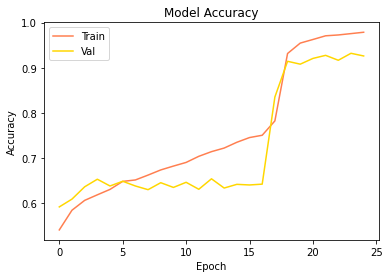

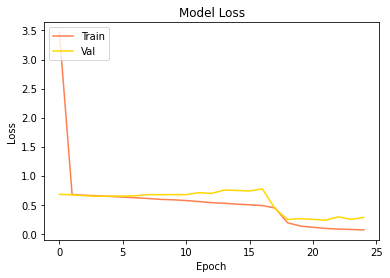

In [14]:
#accuracy
plt.plot(history.history['accuracy'],'coral')
plt.plot(history.history['val_accuracy'],'gold')
plt.title('Model Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Train','Val'],loc='upper left')
plt.show()

#Loss
plt.plot(history.history['loss'],'coral')
plt.plot(history.history['val_loss'],'gold')
plt.title('Model Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Train','Val'],loc='upper left')
plt.show()

In [14]:
classifier.metrics_names

['loss', 'accuracy']

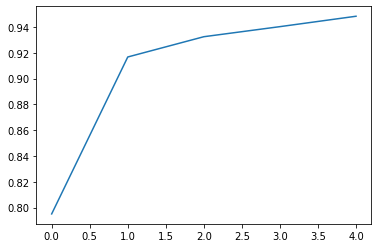

In [17]:
plt.plot(history.history['accuracy'])

In [18]:
history.history.keys() 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

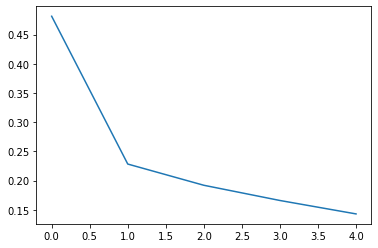

In [19]:
plt.plot(history.history['loss'])

In [21]:
y_test.shape

(5512, 2)

In [24]:
print("Test_Accuracy: {:.2f}%".format(classifier.evaluate(np.array(X_test), np.array(y_test))[1]*100))

173/173 [==============================] - 7s 42ms/step - loss: 0.1732 - accuracy: 0.9394
Test_Accuracy: 93.94%


In [27]:
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rescale = 1/255,
                                     zoom_range = 0.3,
                                     horizontal_flip = True,
                                     rotation_range = 30)

test_generator = ImageDataGenerator(rescale = 1/255)

train_generator = train_generator.flow(np.array(X_train),
                                       y_train,
                                       batch_size = 64,
                                       shuffle = False)

test_generator = test_generator.flow(np.array(X_test),
                                     y_test,
                                     batch_size = 64,
                                     shuffle = False
)

In [28]:
history = classifier.fit_generator(train_generator,
                                   steps_per_epoch = len(X_train)/64,
                                   epochs = 5,
                                   shuffle = False)

C:\Users\User\AppData\Local\Temp\ipykernel_9700\2888891056.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = classifier.fit_generator(train_generator,


Epoch 1/5
344/344 [==============================] - 137s 395ms/step - loss: 0.2194 - accuracy: 0.9213
Epoch 2/5
344/344 [==============================] - 169s 491ms/step - loss: 0.1914 - accuracy: 0.9350
Epoch 3/5
344/344 [==============================] - 167s 486ms/step - loss: 0.1793 - accuracy: 0.9403
Epoch 4/5
344/344 [==============================] - 169s 492ms/step - loss: 0.1796 - accuracy: 0.9389
Epoch 5/5
344/344 [==============================] - 165s 478ms/step - loss: 0.1702 - accuracy: 0.9433


In [29]:
print("Test_Accuracy(after augmentation): {:.2f}%".format(classifier.evaluate_generator(test_generator, steps = len(X_test), verbose = 1)[1]*100))

C:\Users\User\AppData\Local\Temp\ipykernel_9700\69512294.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  print("Test_Accuracy(after augmentation): {:.2f}%".format(classifier.evaluate_generator(test_generator, steps = len(X_test), verbose = 1)[1]*100))


5512/5512 [==============================] - 11s 2ms/step - loss: 0.1360 - accuracy: 0.9546
Test_Accuracy(after augmentation): 95.46%


In [31]:
from tensorflow.keras.applications.vgg19 import VGG19

In [32]:
IMAGE_SIZE = [64,64]

In [33]:
vgg19 =  VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80134624/80134624 [==============================] - 139s 2us/step


In [34]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [35]:
for layer in vgg19.layers:
    layer.trainable = False

In [36]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from glob import glob

In [37]:
folders = glob('E:\Thesis 4100\Malaria_Cell_Detection\Malaria_Detection_using_CNN\cell_images\cell_images\*')

In [38]:
folders = folders[:2]

In [39]:
folders

['E:\\Thesis 4100\\Malaria_Cell_Detection\\Malaria_Detection_using_CNN\\cell_images\\cell_images\\Parasitized',
 'E:\\Thesis 4100\\Malaria_Cell_Detection\\Malaria_Detection_using_CNN\\cell_images\\cell_images\\Uninfected']

In [40]:
x = Flatten()(vgg19.output)